<a href="https://colab.research.google.com/github/LeonardoLuca/GamesSwitch_DataScience/blob/main/GamesSwitch_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abrindo dataset

In [ ]:
# Instalando imports
import pandas as pd
import numpy as np
import io
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy import log10

In [ ]:
# Abrindo dataset

with open('/content/sample_data/dekudeals_games.csv', 'r') as f:
       conteudo = f.read()
       print(conteudo)

﻿Game|MSRP|Release date|Genre|Number of players|Developer|Publisher|Download size|Metacritic Score|Metacritic User Score|OpenCritic|How Long To Beat|Play modes|Languages|Platforms
Super Mario Odyssey|R$349,00|October 27, 2017|Platformer, Action|Offline: 1 - 2; Online: 1|Nintendo|Nintendo|5.609 GB|97|8.9|97|Main Story: 12½ hours; Main + Extra: 27 hours; Completionist: 62 hours|N/A|N/A|N/A
The Legend of Zelda: Breath of the Wild|R$349,00|March  3, 2017|Adventure, Action, Role-Playing|Offline: 1|Nintendo|Nintendo|14.416 GB|97|8.9|96|Main Story: 50½ hours; Main + Extra: 98½ hours; Completionist: 193½ hours|N/A|N/A|N/A
The Legend of Zelda: Tears of the Kingdom|R$399,00|May 12, 2023|Adventure, Action, Role-Playing|Offline: 1|Nintendo|Nintendo|16.474 GB|96|8.8|95|Main Story: 59 hours; Main + Extra: 117 hours; Completionist: 248½ hours|N/A|N/A|N/A
The House in Fata Morgana: Dreams of the Revenants Edition||||Offline: 1|Novectacle|Limited Run Games|3.215 GB|96|7.0||Main Story: 30 hours; Main + 


# Definição de Tipos

In [ ]:
#Transformando em Dataframe
import pandas as pd

conteudoDataFrame = pd.read_csv('/content/sample_data/dekudeals_games.csv', sep = '|')
print(conteudoDataFrame)

                                                 Game      MSRP  \
0                                 Super Mario Odyssey  R$349,00   
1             The Legend of Zelda: Breath of the Wild  R$349,00   
2           The Legend of Zelda: Tears of the Kingdom  R$399,00   
3   The House in Fata Morgana: Dreams of the Reven...       NaN   
4                                            Portal 2       NaN   
5                        Portal: Companion Collection   R$63,99   
6               Vampire Survivors: Ode to Castlevania    R$9,95   
7                            Metroid Prime Remastered  R$239,00   
8                         The Elder Scrolls V: Skyrim  R$299,00   
9                            Tetris Effect: Connected  R$203,95   
10                         Braid, Anniversary Edition   R$74,95   
11                                        Cobalt Core   R$59,99   
12                           The Witcher 3: Wild Hunt  R$179,99   
13                      Ori and the Will of the Wisps  R$168,0

In [ ]:
#Definir os tipos das colunas

category_cols = [
    "Genre",
    "Number of players",
    "Developer",
    "Publisher",
    "Platforms"
]

conteudoDataFrame[category_cols] = conteudoDataFrame[category_cols].astype("category")

# Verificar os tipos
print(conteudoDataFrame.dtypes)

Game                       object
MSRP                       object
Release date               object
Genre                    category
Number of players        category
Developer                category
Publisher                category
Download size              object
Metacritic Score            int64
Metacritic User Score     float64
OpenCritic                float64
How Long To Beat           object
Play modes                float64
Languages                 float64
Platforms                category
dtype: object


In [ ]:
conteudoDataFrame['Genre'].cat.categories

Index(['Action', 'Action, Action', 'Action, Action, Role-Playing',
       'Action, Adventure, Platformer',
       'Action, Adventure, Platformer, Puzzle', 'Action, Adventure, Puzzle',
       'Action, Adventure, Role-Playing', 'Action, Fighting',
       'Action, Fighting, Multiplayer', 'Action, Platformer',
       'Action, Puzzle, Platformer',
       'Adventure, Action, First-Person, Platformer',
       'Adventure, Action, Role-Playing', 'Arcade, Platformer, Role-Playing',
       'Platformer, Action', 'Platformer, Multiplayer, Action', 'Puzzle',
       'Puzzle, Adventure', 'Puzzle, Multiplayer, Music, Arcade',
       'Puzzle, Platformer, Adventure', 'Racing, Multiplayer', 'Role-Playing',
       'Role-Playing, Action', 'Role-Playing, Action, Adventure',
       'Role-Playing, Adventure', 'Strategy, Action, Fighting, Arcade',
       'Strategy, Puzzle, Role-Playing, Board Game'],
      dtype='object')

# Tratamento de Dados Ausentes

In [ ]:
conteudoDataFrame.shape

(32, 15)

In [ ]:
print(conteudoDataFrame.isnull().sum())

Game                      0
MSRP                      3
Release date             19
Genre                     1
Number of players         1
Developer                 2
Publisher                 0
Download size             0
Metacritic Score          0
Metacritic User Score     0
OpenCritic                4
How Long To Beat          1
Play modes               32
Languages                32
Platforms                10
dtype: int64


In [ ]:
conteudoDataFrameNotNulll = conteudoDataFrame.dropna(thresh=0.7*len(conteudoDataFrame), axis=1)
print(conteudoDataFrameNotNulll.isnull().sum())

Game                     0
MSRP                     3
Genre                    1
Number of players        1
Developer                2
Publisher                0
Download size            0
Metacritic Score         0
Metacritic User Score    0
OpenCritic               4
How Long To Beat         1
dtype: int64


# Normalização e Discretização

In [ ]:
#Convertendo a coluna MSRP para float

df = conteudoDataFrameNotNulll

# A única mudança é adicionar .str.replace('.', '', regex=False)
df['MSRP'] = pd.to_numeric(
    df['MSRP']
        .str.replace('R$', '', regex=False)      # 1. Remove o 'R$'
        .str.replace('.', '', regex=False)      # 2. IMPORTANTE: Remove o separador de milhar '.'
        .str.replace(',', '.', regex=False)      # 3. Troca a vírgula decimal por ponto
        .str.strip(),                           # 4. Remove espaços em branco no início/fim
    errors='coerce'
)

# Imprime o resultado para conferir
print("--- DataFrame Transformado ---")
print(df)
print("\nTipo de dados da coluna 'MSRP':", df['MSRP'].dtype)

--- DataFrame Transformado ---
                                                 Game    MSRP  \
0                                 Super Mario Odyssey  349.00   
1             The Legend of Zelda: Breath of the Wild  349.00   
2           The Legend of Zelda: Tears of the Kingdom  399.00   
3   The House in Fata Morgana: Dreams of the Reven...     NaN   
4                                            Portal 2     NaN   
5                        Portal: Companion Collection   63.99   
6               Vampire Survivors: Ode to Castlevania    9.95   
7                            Metroid Prime Remastered  239.00   
8                         The Elder Scrolls V: Skyrim  299.00   
9                            Tetris Effect: Connected  203.95   
10                         Braid, Anniversary Edition   74.95   
11                                        Cobalt Core   59.99   
12                           The Witcher 3: Wild Hunt  179.99   
13                      Ori and the Will of the Wisps  168.

/tmp/ipython-input-29-3188110376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MSRP'] = pd.to_numeric(


In [ ]:
#Discretizando os precos

df['prices'] = pd.cut(df['MSRP'], 10)
df['prices'].value_counts()

In [ ]:
#Discretizando o Metacritic Score

df['ranking'] = pd.cut(df['Metacritic Score'], 10)
df['ranking'].value_counts()

,count
ranking,
"(91.4, 92.1]",10
"(92.8, 93.5]",6
"(93.5, 94.2]",5
"(90.7, 91.4]",3
"(94.9, 95.6]",3
"(96.3, 97.0]",2
"(95.6, 96.3]",2
"(89.993, 90.7]",1
"(92.1, 92.8]",0


# Limpeza de Dados e Visualizacao dos dados


In [ ]:
df['MSRP'].plot.box()

NameError: name 'df' is not defined

In [ ]:
df['MSRP'].hist()

NameError: name 'df' is not defined

<Axes: >

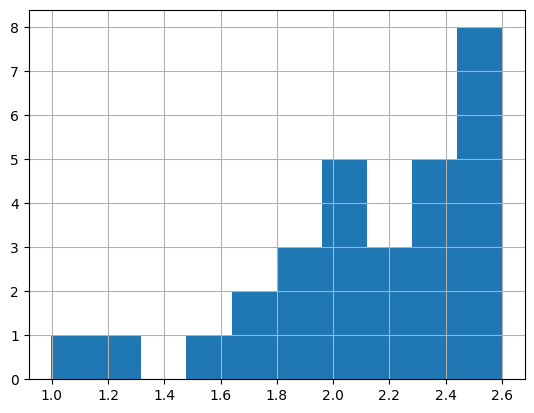

In [ ]:
df['MSRP_log'] = log10(df['MSRP'])
df['MSRP_log'].hist()

In [ ]:
df.plot.scatter(x='Metacritic Score',y='MSRP')

NameError: name 'df' is not defined

In [ ]:
df['comp'] = df['MSRP'] / df['Metacritic Score']

<Axes: >

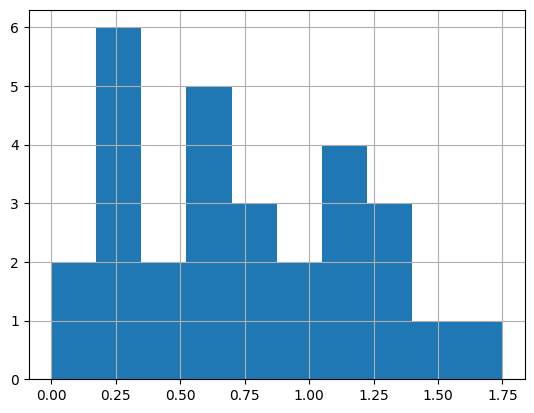

In [ ]:
mad = abs(df['comp'] - df['comp'].median()).median()*(1/0.6745)
(abs(df['comp']-df['comp'].median())/mad).hist()


In [ ]:

df2 = df[abs(df['comp']-df['comp'].median())/mad < 3.5]
print(len(df2))

29


# Teste de Regressão

--- Avaliação do Modelo ---
R² (R-quadrado): -0.029238280901133118
Erro Médio Absoluto (MAE): 1.0202315443015786

--- Coeficientes do Modelo ---
Intercepto (a): 93.54
Coeficiente de 'Size_MB' (b): -0.0000


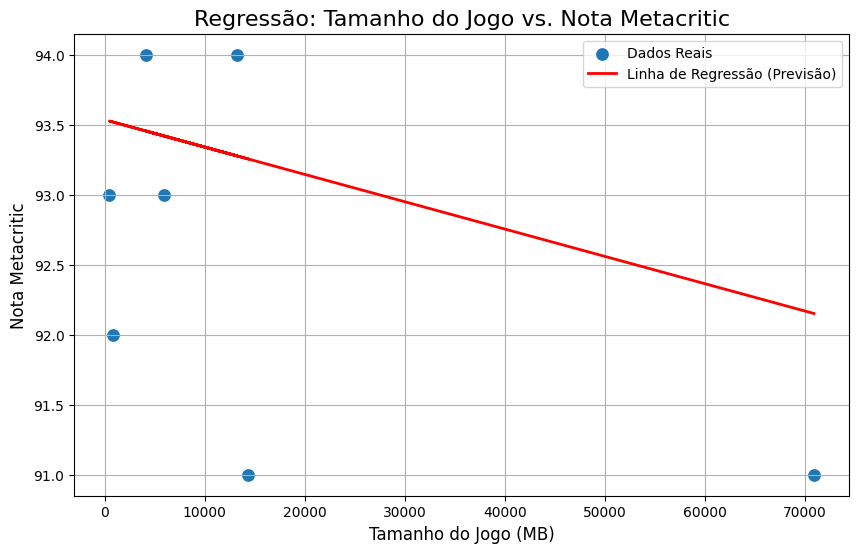

In [ ]:
def convert_size_to_mb(size_str):
    if pd.isna(size_str):
        return None
    size_str = str(size_str).lower().strip()
    try:
        # Extrai o número da string
        num = float(re.findall(r"[\d\.]+", size_str)[0])
        if 'gb' in size_str:
            return num * 1024  # Converte GB para MB
        elif 'mb' in size_str:
            return num
    except (ValueError, IndexError):
        return None

df['Size_MB'] = df['Download size'].apply(convert_size_to_mb)

# Remove linhas onde não temos o tamanho ou a nota do Metacritic
df_clean = df.dropna(subset=['Size_MB', 'Metacritic Score']).copy()

# --- Etapa 3: Preparar e Dividir os Dados para a Regressão ---

# X é a variável que usamos para prever (variável independente)
# Usamos colchetes duplos para manter como um DataFrame
X = df_clean[['Size_MB']]

# y é a variável que queremos prever (variável dependente)
y = df_clean['Metacritic Score']

# Dividimos os dados: 80% para treinar o modelo, 20% para testar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Etapa 4: Treinar o Modelo de Regressão Linear ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Etapa 5: Fazer Previsões e Avaliar o Modelo ---
y_pred = model.predict(X_test)

print("--- Avaliação do Modelo ---")
print('R² (R-quadrado):', metrics.r2_score(y_test, y_pred))
print('Erro Médio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))

print("\n--- Coeficientes do Modelo ---")
print(f"Intercepto (a): {model.intercept_:.2f}")
print(f"Coeficiente de 'Size_MB' (b): {model.coef_[0]:.4f}")

# --- Etapa 6: Visualizar os Resultados ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Size_MB'], y=y_test, label='Dados Reais', s=100)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão (Previsão)')
plt.title('Regressão: Tamanho do Jogo vs. Nota Metacritic', fontsize=16)
plt.xlabel('Tamanho do Jogo (MB)', fontsize=12)
plt.ylabel('Nota Metacritic', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#Sem Relação Visível: Os pontos no gráfico estão totalmente espalhados, o que mostra que não há uma ligação clara entre o tamanho de um jogo e sua nota.

#Péssimo Previsor: A estatística (R² negativo) confirma que o tamanho do jogo é um péssimo previsor para a nota. Um R² negativo significa que o modelo se ajusta pior aos dados do que uma simples linha horizontal que representasse a média de todas as notas. Em resumo, o modelo não tem nenhum poder de previsão.

#Linha de Tendência Ineficaz: A linha vermelha no gráfico, que deveria mostrar uma tendência, é quase horizontal e não representa bem os dados, reforçando que não há um padrão.